In [2]:
import pandas as pd 
%matplotlib inline

fpath = './shanghai_weather/shanghai_weather_2019.csv'
df = pd.read_csv(fpath)

In [3]:
df.loc[:, 'bWendu'] = df['bWendu'].str.replace("℃", "").astype('int32')

In [4]:
df.loc[:, 'yWendu'] = df['yWendu'].str.replace("℃", "").astype('int32')

In [5]:
df.head()

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
0,2019-01-01,6,3,阴~多云,西北风,3级,39,优,1
1,2019-01-02,8,4,阴~多云,东北风,2级,86,良,2
2,2019-01-03,10,8,多云~小雨,东北风,2级,71,良,2
3,2019-01-04,10,8,小雨,东南风,2级,33,优,1
4,2019-01-05,10,5,小雨,西北风,2级,46,优,1


In [6]:
df.set_index(pd.to_datetime(df['ymd']), inplace = True)

In [7]:
df.head()

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
ymd,,,,,,,,,
2019-01-01,2019-01-01,6,3,阴~多云,西北风,3级,39,优,1
2019-01-02,2019-01-02,8,4,阴~多云,东北风,2级,86,良,2
2019-01-03,2019-01-03,10,8,多云~小雨,东北风,2级,71,良,2
2019-01-04,2019-01-04,10,8,小雨,东南风,2级,33,优,1
2019-01-05,2019-01-05,10,5,小雨,西北风,2级,46,优,1


In [9]:
df.index[0]

Timestamp('2019-01-01 00:00:00')

In [10]:
df.index.week

Int64Index([ 1,  1,  1,  1,  1,  1,  2,  2,  2,  2,
            ...
            51, 52, 52, 52, 52, 52, 52, 52,  1,  1],
           dtype='int64', name='ymd', length=365)

In [11]:
df.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='ymd', length=365)

In [12]:
df.index.quarter

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
           dtype='int64', name='ymd', length=365)

In [18]:
import numpy as np
df_week = df.groupby(df.index.week)['bWendu'].agg([np.max, np.min, np.mean])

<AxesSubplot:xlabel='ymd'>

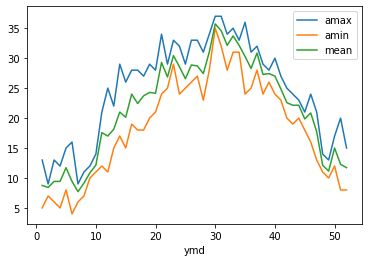

In [19]:
df_week.plot()